**Full Name:** Stav Yosef

**ID:** 316298876

**Google Colab Link:** [https://colab.research.google.com/drive/15oj0j5U0vzYc_DFWK-q_hEnBmNryYMf0?usp=sharing](https://colab.research.google.com/drive/15oj0j5U0vzYc_DFWK-q_hEnBmNryYMf0?usp=sharing)

# Setup

In [ ]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
import pandas as pd
from enum import Enum
import os.path as path

## Download Dataset

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2020-12-12 10:56:23--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.1’

ml-100k.zip.1       100%[===================>]   4.70M  10.7MB/s    in 0.4s    

2020-12-12 10:56:23 (10.7 MB/s) - ‘ml-100k.zip.1’ saved [4924029/4924029]



In [ ]:
!ls

ml-100k  ml-100k.zip  ml-100k.zip.1  sample_data


In [ ]:
!unzip -u ml-100k.zip

Archive:  ml-100k.zip


## Data Managment

In [ ]:
!ls "ml-100k/"

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [ ]:
def get_dataset_folder() -> str:
    return "ml-100k/"

In [ ]:
def get_train_test_path(k: int) -> (str, str):
    if 1 <= k <= 5:
        return path.join(get_dataset_folder(), f'u{k}.base'), path.join(get_dataset_folder(), f'u{k}.test')
    else:
        return None

In [ ]:
def build_matrix(_path: str):
    df = pd.read_csv(_path, sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

    n_users = int(get_num_users())
    n_items = int(get_num_items())

    matrix = np.zeros((n_users, n_items))
    for row in df.itertuples():
        matrix[row[1] - 1, row[2] - 1] = row[3]
    return matrix

In [ ]:
def build_train_test_matrix(k: int) -> (np.ndarray, np.ndarray):
    path_train, path_test = get_train_test_path(k=k)

    return build_matrix(_path=path_train), build_matrix(_path=path_test)

In [ ]:
def build_train_matrix() -> np.ndarray:
    matrix_train, _ = build_train_test_matrix(1)

    for i in range(2, 6, 1):
        train, _ = build_train_test_matrix(i)
        matrix_train += train
    
    return matrix_train

In [ ]:
def build_test_matrix() -> np.ndarray:
    _, matrix_test = build_train_test_matrix(1)

    for i in range(2, 6, 1):
        _, test = build_train_test_matrix(i)
        matrix_test += test
    
    return matrix_test

In [ ]:
def get_data_path() -> str:
    return path.join(get_dataset_folder(), "u.data")

In [ ]:
def get_users_path() -> str:
    return path.join(get_dataset_folder(), "u.user")

In [ ]:
def get_genres_path() -> str:
    return path.join(get_dataset_folder(), "u.genre")

In [ ]:
def get_items_path() -> str:
    return path.join(get_dataset_folder(), "u.item")

In [ ]:
def load_items() -> pd.DataFrame:
    def load_genres() -> list:
        _ = pd.read_csv(get_genres_path(),
                        delimiter='|',
                        names=["Genre", "Code"],
                        encoding='latin-1')

        return _[_.columns[0]].to_list()

    m_cols = ['movie_id', 'movie_title', 'release date', 'video release date', 'IMDb URL'] + load_genres()
    return pd.read_csv(get_items_path(), delimiter='|', names=m_cols, encoding='latin-1')

In [ ]:
def load_data() -> pd.DataFrame:
    m_cols = ['user_id', 'item_id', 'rating', 'timestamp']
    return pd.read_csv(get_data_path(), delimiter='\t', names=m_cols, encoding='latin-1')

In [ ]:
def load_users() -> pd.DataFrame:
    m_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
    return pd.read_csv(get_users_path(), delimiter='\t', names=m_cols, encoding='latin-1')

In [ ]:
def get_num_users() -> int:
    users = load_users()
    return users['user_id'].unique().shape[0]

In [ ]:
def get_num_items() -> int:
    items = load_items()
    return items['movie_id'].unique().shape[0]

# Question 1

In [ ]:
def get_num_ratings() -> int:
    data = load_data()
    return data.shape[0]

In [ ]:
def get_num_users() -> float:
    users = load_users()
    return users['user_id'].unique().shape[0] * 1.0

In [ ]:
def get_num_items() -> int:
    items = load_items()
    return items['movie_id'].unique().shape[0]

In [ ]:
def calc_sparsity() -> int:
    num_ratings = get_num_ratings() * 1.0
    num_users = get_num_users() * 1.0
    num_items = get_num_items() * 1.0

    spars = 1.0 - (num_ratings / (num_users * num_items))

    print("Sparsity:", np.round(spars, 4))

In [ ]:
def calc_averages():
    num_ratings = get_num_ratings() * 1.0
    num_users = get_num_users() * 1.0
    num_items = get_num_items() * 1.0

    print("Average Ratings per User:", np.round(num_ratings / num_users, 2))
    print("Average Ratings per Item:", np.round(num_ratings / num_items, 2))

In [ ]:
def plot_ratings_distribution():
    data = load_data()
    plt.hist(data['rating'], bins=5, edgecolor="black")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.title("Distribution of Ratings")
    plt.show()

In [ ]:
def q1():
    calc_sparsity()
    calc_averages()
    plot_ratings_distribution()

Sparsity: 0.937
Average Ratings per User: 106.04
Average Ratings per Item: 59.45


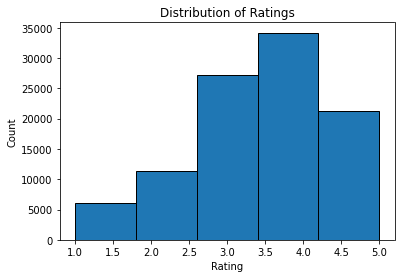

In [ ]:
q1()

# Question 2

## Plotting

In [ ]:
def plot_learning_curve(factors, reg, learning_rate, k, train_rmse_result, test_rmse_result):
    f = factors
    r = reg
    l_r = learning_rate

    x = np.arange(1, len(train_rmse_result) + 1, 1)

    plt.plot(x, train_rmse_result, label='Training')
    plt.plot(x, test_rmse_result, label='Test')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.title(f'K: {k}\nLatent factors: {f}\nLearning rate: {l_r}\nRegularization: {r}')

    plt.show()

## Matrix Factorization Class

In [ ]:
class MinimizeFunction(Enum):
    SGD = 1
    ALS = 2
    BIASONLY = 3

In [ ]:
class MF:
    @staticmethod
    def fix_rate(rate: float) -> int:
        if rate >= 4.5:
            return 5
        elif 4.5 > rate >= 3.5:
            return 4
        elif 3.5 > rate >= 2.5:
            return 3
        elif 2.5 > rate >= 1.5:
            return 2
        else:
            return 1

    def __init__(self,
                 train_matrix: np.ndarray,
                 k_factors: int,
                 minimize_func: MinimizeFunction,
                 reg: float,
                 convergence: float,
                 print_progress: bool,
                 k: int):
        """
        Params
        ======
        train_matrix: (ndarray)
            User x Item train_matrix with corresponding data (ratings)

        k_factors: (int)
            Number of latent factors to use in our train_matrix.
            K must be smaller than user's features AND item's features

        minimize_func: (MinimizeFunction)
            Minimize function that the train_matrix factorization use
            Options:
                SGD = 1
                ALS = 2
                BIASONLY = 3

        reg: (float)
            Regularization for user & item (latent and biases).

        print_progress: (bool)
            If True then print training progress, else don't print.
        """

        self.train_matrix = train_matrix
        self.num_users, self.num_items = train_matrix.shape

        # initialize latent vectors
        self.k_factors = k_factors
        scale = 1.0 / k_factors
        self.user_vec_latent = np.random.normal(scale=scale, size=(self.num_users, self.k_factors))
        self.item_vec_latent = np.random.normal(scale=scale, size=(self.num_items, self.k_factors))

        self.reg = reg
        self.convergence = convergence

        self.minimize_func = minimize_func
        if self.minimize_func is MinimizeFunction.SGD or self.minimize_func is MinimizeFunction.BIASONLY:
            self.matrix_nonzero_row, self.matrix_nonzero_col = self.train_matrix.nonzero()

        self.print_progress = print_progress
        self.k = k

    def start_train(self, iter_array: list, test_matrix: np.ndarray, learning_rate: float):
        """
        Keep track of rmse as a function of training iterations.

        Params
        ======
        iter_array: (list)
            List of numbers of iterations to train for each step of the learning curve.
        test: (2D ndarray)
            Testing dataset (user x item).

        learning_rate : (float)
            Learning rate.
        """

        self.init_train(learning_rate)

        iter_array.sort()
        iterations_so_far = 0

        for (i, n_iterations) in enumerate(iter_array):
            if self.print_progress and i % 5 == 0:
                print(f'{self.k},\tIteration: {n_iterations}')

            self.train(n_iterations - iterations_so_far)

            self.predictions = self.predict_all()

            self.train_rmse_result += [calc_rmse(self.predictions, self.train_matrix)]
            self.test_rmse_result += [calc_rmse(self.predictions, test_matrix)]

            iterations_so_far = n_iterations

            results_n = len(self.test_rmse_result)
            if results_n >= 5:
                last = self.test_rmse_result[results_n - 1]
                mean_last_5 = np.mean(self.test_rmse_result[results_n - 5: results_n])

                if mean_last_5 / last < self.convergence:
                    # print(mean_last_5 / last)
                    #self.save_model()

                    return

    def init_train(self, learning_rate: float):
        self.test_rmse_result = []
        self.train_rmse_result = []

        if self.minimize_func is MinimizeFunction.SGD or self.minimize_func is MinimizeFunction.BIASONLY:
            self.learning_rate = learning_rate
            self.user_bias = np.zeros(self.num_users)
            self.item_bias = np.zeros(self.num_items)
            self.global_bias = 0
            # self.global_bias = np.mean(self.train_matrix[self.train_matrix.nonzero()])
            # self.global_bias = np.mean(self.train_matrix)

    def train(self, n_iterations: int):
        for i in range(1, n_iterations + 1):

            if self.minimize_func is MinimizeFunction.ALS:
                self.als_step()
            elif self.minimize_func is MinimizeFunction.SGD:
                self.sgd()
            elif self.minimize_func is MinimizeFunction.BIASONLY:
                self.bias_only()

    def bias_only(self):
        training_order = np.arange(len(self.matrix_nonzero_row))
        np.random.shuffle(training_order)

        for idx in training_order:
            u_idx = self.matrix_nonzero_row[idx]
            i_idx = self.matrix_nonzero_col[idx]
            prediction = self.predict(u_idx=u_idx, i_idx=i_idx)
            e = (self.train_matrix[u_idx, i_idx] - prediction)

            self.user_bias[u_idx] += self.learning_rate * (e - self.reg * self.user_bias[u_idx])
            self.item_bias[i_idx] += self.learning_rate * (e - self.reg * self.item_bias[i_idx])
            self.global_bias += self.learning_rate * (e - self.global_bias)

    def sgd(self):
        training_order = np.arange(len(self.matrix_nonzero_row))
        np.random.shuffle(training_order)

        for idx in training_order:
            u_idx = self.matrix_nonzero_row[idx]
            i_idx = self.matrix_nonzero_col[idx]
            prediction = self.predict(u_idx=u_idx, i_idx=i_idx)
            if prediction > 5: # האם באמת צריך?
                prediction = 5
            e = (self.train_matrix[u_idx, i_idx] - prediction)

            self.user_bias[u_idx] += self.learning_rate * (e - self.reg * self.user_bias[u_idx])
            self.item_bias[i_idx] += self.learning_rate * (e - self.reg * self.item_bias[i_idx])
            self.global_bias += self.learning_rate * (e - self.global_bias)

            u_v_l = self.user_vec_latent
            i_v_l = self.item_vec_latent
            u_add = self.learning_rate * (e * i_v_l[i_idx, :] - self.reg * u_v_l[u_idx, :])
            i_add = self.learning_rate * (e * u_v_l[u_idx, :] - self.reg * i_v_l[i_idx, :])

            u_v_l[u_idx, :] += u_add
            i_v_l[i_idx, :] += i_add

    def als_step(self):
        """
        Two ALS steps (one for user and the second for item), Solve for the latent vectors

        Formula
        ========
        (x_u)T = r_u * y * (yT * y + lambda * I) ^ -1

        r: (1D ndarray, size: K)
        Row of latent vector (User or Item), the one that we derivate.

        y: (2D ndarray, size: (|User| or |Item|) x K)
        Row of latent vector (User or Item), the one that we dont derivate (the constant one).

        lambda: (float)
        Regularization Value.

        """

        yTy = self.item_vec_latent.T.dot(self.item_vec_latent)
        lambdaI = np.eye(yTy.shape[0]) * self.reg

        for u in range(self.user_vec_latent.shape[0]):
            self.user_vec_latent[u, :] = solve((yTy + lambdaI), self.train_matrix[u, :].dot(self.item_vec_latent))

        xTx = self.user_vec_latent.T.dot(self.user_vec_latent)
        lambdaI = np.eye(xTx.shape[0]) * self.reg

        for i in range(self.item_vec_latent.shape[0]):
            self.item_vec_latent[i, :] = solve((xTx + lambdaI), self.train_matrix[:, i].T.dot(self.user_vec_latent))

    def predict_all(self) -> np.ndarray:
        preds = np.zeros((self.user_vec_latent.shape[0], self.item_vec_latent.shape[0]))

        for u_idx in range(self.user_vec_latent.shape[0]):
            for i_idx in range(self.item_vec_latent.shape[0]):
                preds[u_idx, i_idx] = self.predict(u_idx, i_idx)

        return preds

    def predict(self, u_idx: int, i_idx: int) -> float:
        if self.minimize_func is MinimizeFunction.ALS:
            return self.user_vec_latent[u_idx, :].dot(self.item_vec_latent[i_idx, :].T)
        elif self.minimize_func is MinimizeFunction.SGD:
            pred = self.global_bias + self.user_bias[u_idx] + self.item_bias[i_idx]
            pred += self.user_vec_latent[u_idx, :].dot(self.item_vec_latent[i_idx, :].T)
            return pred
        elif self.minimize_func is MinimizeFunction.BIASONLY:
            return self.global_bias + self.user_bias[u_idx] + self.item_bias[i_idx]


## Popularity Recommender Class

In [ ]:
class PopularityRecommender:
    def __init__(self, matrix: np.ndarray):
        self.matrix = matrix
        self.predications = np.full(self.matrix.shape, -1, dtype=np.float32)

    def train(self):
        sums = np.sum(self.matrix, axis=0)

        for i_idx in range(self.matrix.shape[1]):
            count = len(np.where(self.matrix[:, i_idx] > 0)[0])

            if count == 0:
                x = 0
            else:
                x = sums[i_idx] / count

            for u_idx in range(self.matrix.shape[0]):
                self.predications[u_idx, i_idx] = x

        # s_sum = pd.Series(np.sum(self.matrix, axis=0))
        # s_idx = pd.Series(np.arange(len(s_sum)))
        #
        # for u_idx in range(self.matrix.shape[0]):
        #     df = pd.DataFrame(
        #         {
        #             "rate": s_sum,
        #             "item_index": s_idx,
        #             "user_rate": pd.Series(self.matrix[u_idx, :])
        #         })
        #
        #     df_sorted: pd.DataFrame = df.sort_values(by=["rate"], ascending=False)
        #     df_sorted = df_sorted[df_sorted["user_rate"] == 0]
        #
        #     result = df_sorted["item_index"].to_numpy()
        #     self.predications[u_idx, : len(result)] = result


## Evaluations

In [ ]:
def calc_rmse(_pred: np.ndarray, _actual: np.ndarray) -> float:
    pred = _pred.copy()
    actual = _actual.copy()

    non_zero_indices = actual.nonzero()
    _pred = pred[non_zero_indices].flatten()
    _actual = actual[non_zero_indices].flatten()

    mse = np.power(_pred - _actual, 2).mean()
    return np.sqrt(mse)

In [ ]:
def get_top_recommendation(matrix: np.ndarray, n: int) -> np.ndarray:
    user_len = matrix.shape[0]
    top_n = np.full((user_len, n), -1)

    for i_idx in range(user_len):
        top_n[i_idx, :] = np.flip(np.argsort(matrix[i_idx, :]))[:n]

    return top_n

In [ ]:
def calc_mrr(matrix: np.ndarray, preds: np.ndarray) -> float:
    _sum = 0.0
    for i in range(matrix.shape[0]):
        user = matrix[i, :]
        pred = preds[i, :]

        non_zero = user.nonzero()

        df = pd.DataFrame({"user": pd.Series(user[non_zero]), "pred": pd.Series(pred[non_zero])})

        df_sorted: pd.DataFrame = df.sort_values(by=["user", "pred"], ascending=False)

        df_sorted.values[df_sorted.values < 3] = 0
        df_sorted.values[df_sorted.values >= 3] = 1

        u_arr = df_sorted["user"].values
        p_arr = df_sorted["pred"].values

        for j in range(len(u_arr)):
            if u_arr[j] == 1 and p_arr[j] == 1:
                _sum += 1 / (j + 1)
                break

    return _sum / (matrix.shape[0] * 1.0)

In [ ]:
def calc_dcg(matrix: np.ndarray, preds: np.ndarray, pos: int) -> float:
    _preds = preds.copy()
    _preds[_preds < 3] = 0

    _sum = 0.0
    for u_idx in range(matrix.shape[0]):
        _s = 0.0
        for i_idx in range(min(matrix.shape[1], max(1, pos))):
            if _preds[u_idx, i_idx] > 0:
                x = _preds[u_idx, i_idx] / np.math.log2(i_idx + 2)
                _sum += x

    return _sum / (matrix.shape[0] * 1.0)

In [ ]:
def calc_idcg(matrix: np.ndarray, preds: np.ndarray, pos: int) -> float:
    _preds = preds.copy()
    _preds[_preds < 3] = 0
    _preds = np.flip(np.sort(_preds))

    _sum = 0.0
    for u_idx in range(matrix.shape[0]):
        _s = 0.0
        for i_idx in range(min(matrix.shape[1], max(1, pos))):
            if _preds[u_idx, i_idx] > 0:
                x = _preds[u_idx, i_idx] / np.math.log2(i_idx + 2)
                _sum += x

    return _sum / (matrix.shape[0] * 1.0)

In [ ]:
def calc_ndcg(matrix: np.ndarray, preds: np.ndarray, pos: int) -> float:
    return calc_dcg(matrix=matrix, preds=preds, pos=pos) / calc_idcg(matrix=matrix, preds=preds, pos=pos)

## Models in Action

We choose to display SGD and Simple Popularity but implemented above ALS & Bias only.

In [ ]:
def index_to_item_name(top_n: np.ndarray) -> list:
    items = load_items()

    final_result = []
    for i in range(top_n.shape[0]):
        r = []
        for j in range(top_n.shape[1]):
            idx = top_n[i, j]
            r.append([idx, items["movie_title"][idx]])
        final_result.append(r)

    return final_result


### SGD

In [ ]:
def run_mf_sgd(k: int, k_latent: int, reg: float, l_rate: float):
    train_matrix, test_matrix = build_train_test_matrix(k)

    mf_sgd = MF(train_matrix=train_matrix,
                k_factors=k_latent,
                minimize_func=MinimizeFunction.SGD,
                reg=reg,
                convergence=1.01,
                print_progress=True,
                k=k)

    iter_array = np.arange(1, 101)

    mf_sgd.start_train(iter_array=iter_array, test_matrix=test_matrix, learning_rate=l_rate)

    return mf_sgd

#### Factor latent = 20 Regularization = 0.1 Learning Rate = 0.01

In [ ]:
k_latent = 20
reg = 0.1
l_rate = 0.01

models_1 = []
for i in range(1, 6, 1):
    models_1.append(run_mf_sgd(k=i, k_latent=k_latent, reg=reg, l_rate=l_rate))

train_rmse_result_1 = []
test_rmse_result_1 = []
for i in range(5):
    train_rmse_result_1.append(models_1[i].train_rmse_result)
    test_rmse_result_1.append(models_1[i].test_rmse_result)
    print("Train RMSE:", models_1[i].train_rmse_result)
    print("Test RMSE:", models_1[i].test_rmse_result)

1,	Iteration: 1
1,	Iteration: 6
1,	Iteration: 11
2,	Iteration: 1
2,	Iteration: 6
2,	Iteration: 11
3,	Iteration: 1
3,	Iteration: 6
4,	Iteration: 1
4,	Iteration: 6
5,	Iteration: 1
5,	Iteration: 6
5,	Iteration: 11
Train RMSE: [1.2404149299890852, 1.0738859764901236, 1.0271616920472115, 1.0047134207483293, 0.964567579668365, 0.9624110103753214, 0.9528739281633414, 0.9458648743508556, 0.9285118334324517, 0.9369885060908935, 0.9616958886061827]
Test RMSE: [1.3543894854285838, 1.1604799165196322, 1.1036270596411, 1.0744275897272133, 1.026391551809848, 1.0220739755977521, 1.0107660493557982, 1.0009964070245634, 0.9810946065691644, 0.9891361092756992, 1.0141207993302945]
Train RMSE: [1.1866726357238915, 1.0917096644134598, 1.0030182896565674, 0.9806473632817242, 1.0013013699931896, 0.9756672635996688, 0.9499668362039716, 0.9456338374242746, 0.9520687718102031, 0.9304164240292627, 0.928594112291637, 0.9260918204640128, 0.9425948665949344]
Test RMSE: [1.239629506045324, 1.1391323047100477, 1.0440

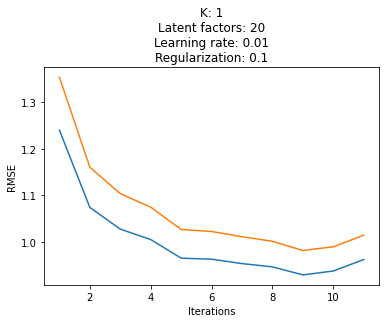

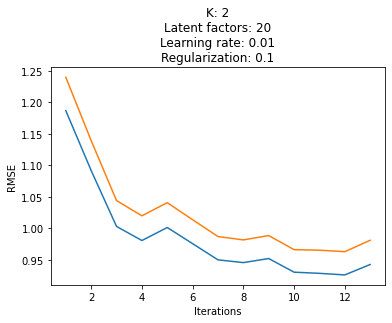

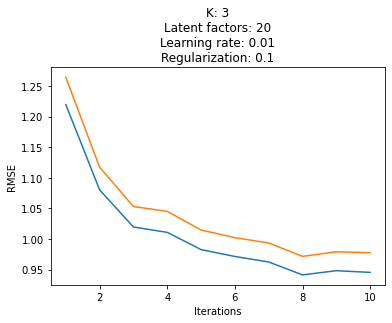

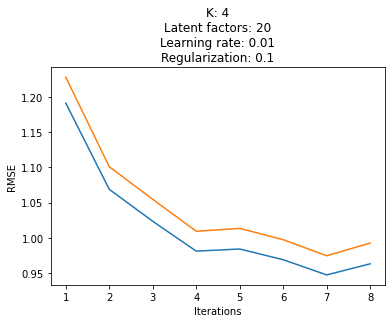

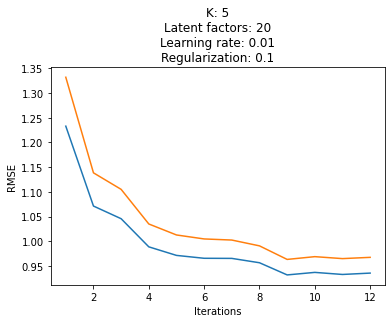

[[1.2404149299890852, 1.0738859764901236, 1.0271616920472115, 1.0047134207483293, 0.964567579668365, 0.9624110103753214, 0.9528739281633414, 0.9458648743508556, 0.9285118334324517, 0.9369885060908935, 0.9616958886061827], [1.1866726357238915, 1.0917096644134598, 1.0030182896565674, 0.9806473632817242, 1.0013013699931896, 0.9756672635996688, 0.9499668362039716, 0.9456338374242746, 0.9520687718102031, 0.9304164240292627, 0.928594112291637, 0.9260918204640128, 0.9425948665949344], [1.2197216126967803, 1.0803579922163458, 1.0196266109655587, 1.0108830215687357, 0.9827182895793689, 0.9714438483172437, 0.9624980933678466, 0.9413367640560576, 0.9482593838886564, 0.9454493139455648], [1.1909218075694903, 1.0688249066270188, 1.023555090890364, 0.9812542016389559, 0.9842877434354464, 0.9691043418331926, 0.9475839735940942, 0.9633239959802633], [1.2330254047021945, 1.0713289714023768, 1.045672608679688, 0.9887299074992714, 0.9714101097795265, 0.9655668364618185, 0.9653534219798547, 0.956529891413

In [ ]:
for i in range(5):
    plot_learning_curve(20 ,0.1 ,0.01 ,i + 1 ,train_rmse_result_1[i], test_rmse_result_1[i])

print(train_rmse_result_1)
print(test_rmse_result_1)

In [ ]:
preds_1 = models_1[0].predictions.copy()
for j in range(1, 5, 1):
    preds_1 += models_1[j].predictions

preds_1 /= 5.0

top_n = get_top_recommendation(preds_1, 10)
final_result = index_to_item_name(top_n=top_n)

for i in range (5):
    print(f'User {i +1} recommendations: {final_result[i]}')

User 1 recommendations: [[407, 'Close Shave, A (1995)'], [168, 'Wrong Trousers, The (1993)'], [317, "Schindler's List (1993)"], [63, 'Shawshank Redemption, The (1994)'], [482, 'Casablanca (1942)'], [113, 'Wallace & Gromit: The Best of Aardman Animation (1996)'], [602, 'Rear Window (1954)'], [11, 'Usual Suspects, The (1995)'], [126, 'Godfather, The (1972)'], [271, 'Good Will Hunting (1997)']]
User 2 recommendations: [[407, 'Close Shave, A (1995)'], [168, 'Wrong Trousers, The (1993)'], [317, "Schindler's List (1993)"], [63, 'Shawshank Redemption, The (1994)'], [482, 'Casablanca (1942)'], [113, 'Wallace & Gromit: The Best of Aardman Animation (1996)'], [271, 'Good Will Hunting (1997)'], [11, 'Usual Suspects, The (1995)'], [602, 'Rear Window (1954)'], [49, 'Star Wars (1977)']]
User 3 recommendations: [[407, 'Close Shave, A (1995)'], [168, 'Wrong Trousers, The (1993)'], [317, "Schindler's List (1993)"], [63, 'Shawshank Redemption, The (1994)'], [482, 'Casablanca (1942)'], [113, 'Wallace & G

In [ ]:
matrix = build_test_matrix()

mrr = calc_mrr(matrix=matrix, preds=preds_1)
print("MRR:", mrr)

ndcg = calc_ndcg(matrix=matrix, preds=preds_1, pos=5)
print("NDCG pos=5:", ndcg)

ndcg = calc_ndcg(matrix=matrix, preds=preds_1, pos=10)
print("NDCG pos=10:", ndcg)

MRR: 0.9758652270317171
NDCG pos=5: 0.5494750601557992
NDCG pos=10: 0.63843439833611


#### Factor latent = 10 Regularization = 0.01 Learning Rate = 0.001

In [ ]:
k_latent = 10
reg = 0.01
l_rate = 0.001

models_2 = []
for i in range(1, 6, 1):
    models_2.append(run_mf_sgd(k=i, k_latent=k_latent, reg=reg, l_rate=l_rate))

train_rmse_result_2 = []
test_rmse_result_2 = []
for i in range(5):
    train_rmse_result_2.append(models_2[i].train_rmse_result)
    test_rmse_result_2.append(models_2[i].test_rmse_result)
    print("Train RMSE:", models_2[i].train_rmse_result)
    print("Test RMSE:", models_2[i].test_rmse_result)

1,	Iteration: 1
1,	Iteration: 6
1,	Iteration: 11
1,	Iteration: 16
1,	Iteration: 21
1,	Iteration: 26
2,	Iteration: 1
2,	Iteration: 6
2,	Iteration: 11
2,	Iteration: 16
2,	Iteration: 21
3,	Iteration: 1
3,	Iteration: 6
3,	Iteration: 11
3,	Iteration: 16
3,	Iteration: 21
3,	Iteration: 26
4,	Iteration: 1
4,	Iteration: 6
4,	Iteration: 11
4,	Iteration: 16
4,	Iteration: 21
5,	Iteration: 1
5,	Iteration: 6
5,	Iteration: 11
5,	Iteration: 16
5,	Iteration: 21
5,	Iteration: 26
5,	Iteration: 31
Train RMSE: [1.8672222870850443, 1.6996953832375594, 1.5649437361053895, 1.4959702247438744, 1.4017751407352224, 1.346377330629956, 1.3357104029357743, 1.2867975594944687, 1.2529812191685945, 1.2254294901312641, 1.2021554682385236, 1.1789687148642574, 1.1570748762467478, 1.1498316853339756, 1.1335710687237843, 1.120113159495717, 1.112211162691579, 1.0884597086871461, 1.0809911680278559, 1.0777799607546303, 1.0683800619846542, 1.0631753372904185, 1.0522543021144046, 1.0515577223484593, 1.0444766159214578, 1.03269

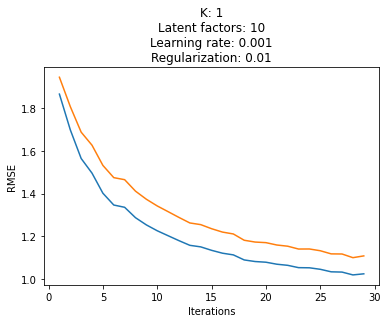

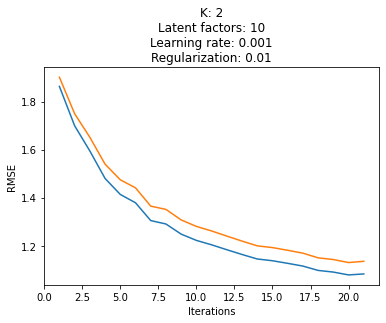

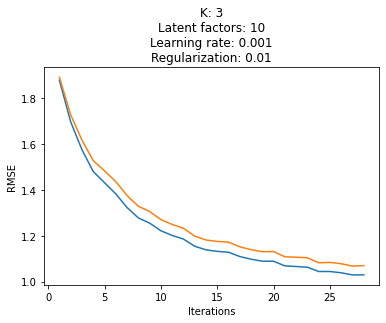

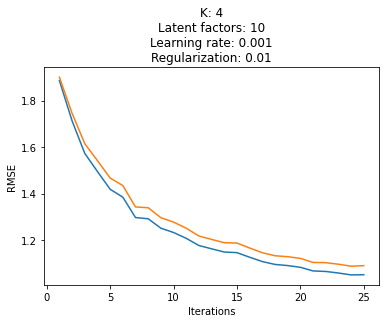

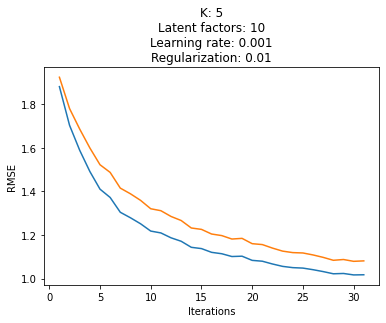

[[1.8672222870850443, 1.6996953832375594, 1.5649437361053895, 1.4959702247438744, 1.4017751407352224, 1.346377330629956, 1.3357104029357743, 1.2867975594944687, 1.2529812191685945, 1.2254294901312641, 1.2021554682385236, 1.1789687148642574, 1.1570748762467478, 1.1498316853339756, 1.1335710687237843, 1.120113159495717, 1.112211162691579, 1.0884597086871461, 1.0809911680278559, 1.0777799607546303, 1.0683800619846542, 1.0631753372904185, 1.0522543021144046, 1.0515577223484593, 1.0444766159214578, 1.0326994789936739, 1.0314205992646028, 1.0181192871832412, 1.0232615567435137], [1.8627106120284187, 1.69905996187453, 1.5941811771602563, 1.4798082861900432, 1.4132658645519707, 1.3786741823368844, 1.304541659423924, 1.290272087827887, 1.2481447733037743, 1.2220654854398645, 1.203658506963868, 1.183229084031133, 1.1634140064789833, 1.1447396671198395, 1.1374176589102514, 1.1265992368954307, 1.1152019784179419, 1.097125806224586, 1.090208622038845, 1.0784164801086038, 1.082472355685809], [1.8774

In [ ]:
for i in range(5):
    plot_learning_curve(10, 0.01 ,0.001 ,i + 1 ,train_rmse_result_2[i], test_rmse_result_2[i])

print(train_rmse_result_2)
print(test_rmse_result_2)

In [ ]:
preds_2 = models_2[0].predictions.copy()
for j in range(1, 5, 1):
    preds_2 += models_2[j].predictions

preds_2 /= 5.0

top_n = get_top_recommendation(preds_2, 10)
final_result = index_to_item_name(top_n=top_n)

for i in range (5):
    print(f'User {i +1} recommendations: {final_result[i]}')

User 1 recommendations: [[312, 'Titanic (1997)'], [301, 'L.A. Confidential (1997)'], [271, 'Good Will Hunting (1997)'], [49, 'Star Wars (1977)'], [317, "Schindler's List (1993)"], [126, 'Godfather, The (1972)'], [63, 'Shawshank Redemption, The (1994)'], [482, 'Casablanca (1942)'], [407, 'Close Shave, A (1995)'], [514, 'Boot, Das (1981)']]
User 2 recommendations: [[312, 'Titanic (1997)'], [271, 'Good Will Hunting (1997)'], [301, 'L.A. Confidential (1997)'], [49, 'Star Wars (1977)'], [317, "Schindler's List (1993)"], [126, 'Godfather, The (1972)'], [482, 'Casablanca (1942)'], [63, 'Shawshank Redemption, The (1994)'], [11, 'Usual Suspects, The (1995)'], [602, 'Rear Window (1954)']]
User 3 recommendations: [[312, 'Titanic (1997)'], [271, 'Good Will Hunting (1997)'], [301, 'L.A. Confidential (1997)'], [49, 'Star Wars (1977)'], [317, "Schindler's List (1993)"], [126, 'Godfather, The (1972)'], [482, 'Casablanca (1942)'], [63, 'Shawshank Redemption, The (1994)'], [11, 'Usual Suspects, The (199

In [ ]:
matrix = build_test_matrix()

mrr = calc_mrr(matrix=matrix, preds=preds_2)
print("MRR:", mrr)

ndcg = calc_ndcg(matrix=matrix, preds=preds_2, pos=5)
print("NDCG pos=5:", ndcg)

ndcg = calc_ndcg(matrix=matrix, preds=preds_2, pos=10)
print("NDCG pos=10:", ndcg)

MRR: 0.9523280408970638
NDCG pos=5: 0.4189756574050505
NDCG pos=10: 0.467719983343681


#### Factor latent = 40 Regularization = 1 Learning Rate = 0.1

Example when we choose **bad** paramaters:

In [ ]:
k_latent = 40
reg = 1
l_rate = 0.1

models_3 = []
for i in range(1, 6, 1):
    models_3.append(run_mf_sgd(k=i, k_latent=k_latent, reg=reg, l_rate=l_rate))

train_rmse_result_3 = []
test_rmse_result_3 = []
for i in range(5):
    train_rmse_result_3.append(models_3[i].train_rmse_result)
    test_rmse_result_3.append(models_3[i].test_rmse_result)
    print("Train RMSE:", models_3[i].train_rmse_result)
    print("Test RMSE:", models_3[i].test_rmse_result)

1,	Iteration: 1
2,	Iteration: 1
3,	Iteration: 1
4,	Iteration: 1
4,	Iteration: 6
5,	Iteration: 1
Train RMSE: [1.2154336581835015, 1.2321281712234828, 1.3341943292359855, 1.1930530895074998, 1.3631117035123186]
Test RMSE: [1.2460074551463005, 1.2667934879921452, 1.3525965408338518, 1.2201510624858056, 1.3900605025189807]
Train RMSE: [1.5485573235851786, 1.3129635660944903, 1.2483350348755573, 1.3108263217955676, 1.4986504929963573]
Test RMSE: [1.572159310807777, 1.330212211626258, 1.267428339837022, 1.3242835907534303, 1.521730077888654]
Train RMSE: [1.2560887477935672, 1.3553368902818927, 1.1921114215073907, 1.3983041999907084, 1.5741257538005873]
Test RMSE: [1.2551077387017693, 1.3681619685302664, 1.20280390625256, 1.402565484213461, 1.5821363997507791]
Train RMSE: [1.3589360060880906, 1.2370048640819815, 1.3484665535042895, 1.2673976425909126, 1.278061923427206, 1.235279377396737, 1.4963533679672194]
Test RMSE: [1.3672488855620997, 1.2347542278131236, 1.3497264120210095, 1.27305772268

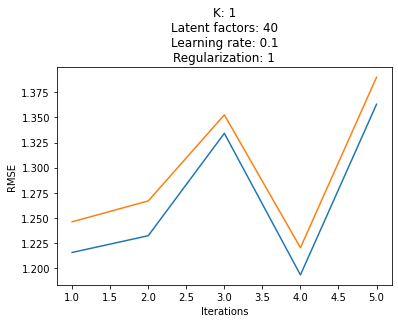

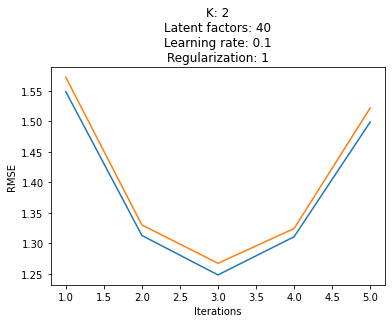

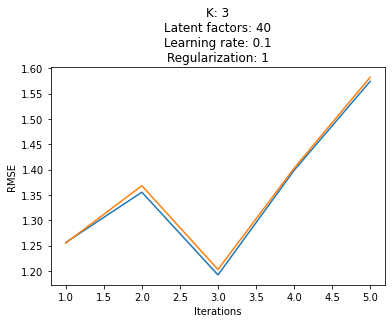

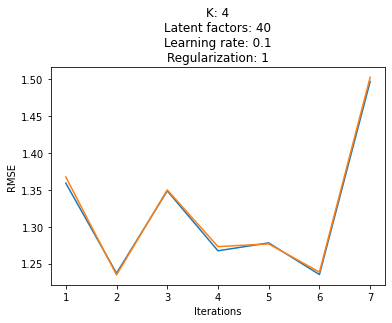

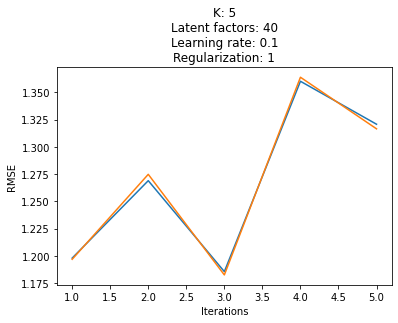

[[1.2154336581835015, 1.2321281712234828, 1.3341943292359855, 1.1930530895074998, 1.3631117035123186], [1.5485573235851786, 1.3129635660944903, 1.2483350348755573, 1.3108263217955676, 1.4986504929963573], [1.2560887477935672, 1.3553368902818927, 1.1921114215073907, 1.3983041999907084, 1.5741257538005873], [1.3589360060880906, 1.2370048640819815, 1.3484665535042895, 1.2673976425909126, 1.278061923427206, 1.235279377396737, 1.4963533679672194], [1.1979669063076723, 1.2689757435381896, 1.1855723526472728, 1.3601506185978958, 1.3207497687344645]]
[[1.2460074551463005, 1.2667934879921452, 1.3525965408338518, 1.2201510624858056, 1.3900605025189807], [1.572159310807777, 1.330212211626258, 1.267428339837022, 1.3242835907534303, 1.521730077888654], [1.2551077387017693, 1.3681619685302664, 1.20280390625256, 1.402565484213461, 1.5821363997507791], [1.3672488855620997, 1.2347542278131236, 1.3497264120210095, 1.2730577226835726, 1.2767295050865555, 1.238573293003886, 1.5021633907582213], [1.1968731

In [ ]:
for i in range(5):
    plot_learning_curve(40, 1 ,0.1 ,i + 1 ,train_rmse_result_3[i], test_rmse_result_3[i])

print(train_rmse_result_3)
print(test_rmse_result_3)

In [ ]:
preds_3 = models_3[0].predictions.copy()
for j in range(1, 5, 1):
    preds_3 += models_3[j].predictions

preds_3 /= 5.0

top_n = get_top_recommendation(preds_3, 10)
final_result = index_to_item_name(top_n=top_n)

for i in range (5):
    print(f'User {i +1} recommendations: {final_result[i]}')

User 1 recommendations: [[1448, 'Pather Panchali (1955)'], [602, 'Rear Window (1954)'], [168, 'Wrong Trousers, The (1993)'], [1292, 'Star Kid (1997)'], [1188, 'Prefontaine (1997)'], [407, 'Close Shave, A (1995)'], [177, '12 Angry Men (1957)'], [118, 'Maya Lin: A Strong Clear Vision (1994)'], [11, 'Usual Suspects, The (1995)'], [1466, 'Saint of Fort Washington, The (1993)']]
User 2 recommendations: [[1448, 'Pather Panchali (1955)'], [602, 'Rear Window (1954)'], [168, 'Wrong Trousers, The (1993)'], [1292, 'Star Kid (1997)'], [1188, 'Prefontaine (1997)'], [407, 'Close Shave, A (1995)'], [177, '12 Angry Men (1957)'], [118, 'Maya Lin: A Strong Clear Vision (1994)'], [11, 'Usual Suspects, The (1995)'], [1466, 'Saint of Fort Washington, The (1993)']]
User 3 recommendations: [[1448, 'Pather Panchali (1955)'], [602, 'Rear Window (1954)'], [168, 'Wrong Trousers, The (1993)'], [1292, 'Star Kid (1997)'], [1188, 'Prefontaine (1997)'], [407, 'Close Shave, A (1995)'], [177, '12 Angry Men (1957)'], [1

In [ ]:
 matrix = build_test_matrix()

 mrr = calc_mrr(matrix=matrix, preds=preds_3)
print("MRR:", mrr)

ndcg = calc_ndcg(matrix=matrix, preds=preds_3, pos=5)
print("NDCG pos=5:", ndcg)

ndcg = calc_ndcg(matrix=matrix, preds=preds_3, pos=10)
print("NDCG pos=10:", ndcg)

MRR: 0.39662780971139855
NDCG pos=5: 0.012607865142274636
NDCG pos=10: 0.05102448411363686


### Simple Popularity

In [ ]:
train_matrix, test_matrix = build_train_test_matrix(1)

mf_pr = PopularityRecommender(matrix=train_matrix)
mf_pr.train()

pred_4 = mf_pr.predications.copy()

for i in range(1, 5, 1):
    train_matrix, test_matrix = build_train_test_matrix(1)

    mf_pr = PopularityRecommender(matrix=train_matrix)
    mf_pr.train()
    pred_4 += mf_pr.predications

pred_4 /= 5.0

In [ ]:
train_rmse = calc_rmse(_pred=pred_4, _actual=build_train_matrix())
test_rmse = calc_rmse(_pred=pred_4, _actual=build_test_matrix())

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 11.431287732784597
Test RMSE: 1.0038670227267206


In [ ]:
top_n = get_top_recommendation(matrix=pred_4, n=10)
final_result = index_to_item_name(top_n=top_n)

for i in range (9):
    print(f'User {i +1} recommendations: {final_result[i]}')

User 1 recommendations: [[1292, 'Star Kid (1997)'], [1121, 'They Made Me a Criminal (1939)'], [1598, "Someone Else's America (1995)"], [1188, 'Prefontaine (1997)'], [1466, 'Saint of Fort Washington, The (1993)'], [1200, 'Marlene Dietrich: Shadow and Light (1996) '], [1499, 'Santa with Muscles (1996)'], [1652, 'Entertaining Angels: The Dorothy Day Story (1996)'], [1448, 'Pather Panchali (1955)'], [1366, 'Faust (1994)']]
User 2 recommendations: [[1292, 'Star Kid (1997)'], [1121, 'They Made Me a Criminal (1939)'], [1598, "Someone Else's America (1995)"], [1188, 'Prefontaine (1997)'], [1466, 'Saint of Fort Washington, The (1993)'], [1200, 'Marlene Dietrich: Shadow and Light (1996) '], [1499, 'Santa with Muscles (1996)'], [1652, 'Entertaining Angels: The Dorothy Day Story (1996)'], [1448, 'Pather Panchali (1955)'], [1366, 'Faust (1994)']]
User 3 recommendations: [[1292, 'Star Kid (1997)'], [1121, 'They Made Me a Criminal (1939)'], [1598, "Someone Else's America (1995)"], [1188, 'Prefontaine

In [ ]:
 matrix = build_test_matrix()

 mrr = calc_mrr(matrix=matrix, preds=pred_4)
print("MRR:", mrr)

ndcg = calc_ndcg(matrix=matrix, preds=pred_4, pos=5)
print("NDCG pos=5:", ndcg)

ndcg = calc_ndcg(matrix=matrix, preds=pred_4, pos=10)
print("NDCG pos=10:", ndcg)

MRR: 0.0002702314187969983
NDCG pos=5: 0.6916769198465521
NDCG pos=10: 0.7192509062473046


### Conclusions

When we implemented Matrix Factorization we saw big differences between SGD and ALS.

First SGD is more suitable for this kind of dataset because we have a lot of missing data, the SGD takes the error of the prediction and goes the other way, and here come the parameters in hand, for example when we set a low learning rate we go slow down the slope till we reach a minimum (can be local minimum) and if we go the other way and put high learning rate as we can see in the third run and go too fast and we jump from "high" point to "low" point and back to "high" point.

ALS works differently, we take the problem and put it into an equation and we "fix" it each iteration. ALS is much faster than SGD but this kind of dataset is not optimal for this kind of approach.


Using bias only is not that bad and give pretty good results (comparing to SGD)

Simple popularity is not "smart" and probably will be good in a non-sparsity dataset only if the rating in a tight range (for example, 1 to 5).

To understand well all kind of approaching MF it's good to put some "extreme"parameters to see which one do what and then optimize them with smart "guesses".

Personally, I'll prefer to use SGD in the future for sure.

## Question 3

#### A

In [ ]:
items = load_items()
genres = items.iloc[:, 5:].to_numpy()
genres_percent = genres / items.shape[0]
_sum = np.sum(genres_percent, axis=0) * 100

_ = pd.read_csv(get_genres_path(),
                delimiter='|',
                names=["Genre", "Code"],
                encoding='latin-1')

cols = _[_.columns[0]].to_list()
df = pd.DataFrame(data=[_sum], columns=cols)

argmax = np.flip(np.argsort(_sum))

percent = np.round(df.iloc[0, argmax[0]], 2)
print(f'The genere {df.columns[argmax[0]]} possessed {percent}% of the movies.')


The genere Drama possessed 43.1% of the movies.


User 1 recommendations: (SGD attempt 2)

1.	L.A. Confidential (1997) - Crime
2.	Titanic (1997) - **Drama**
3.	Good Will Hunting (1997) - **Drama**
4.	Star Wars (1977) - Action
5.	Schindler's List (1993) - **Drama**
6.	Godfather, The (1972) - **Drama**
7.	Shawshank Redemption, The (1994) - **Drama**
8.	Casablanca (1942) - **Drama**
9.	Usual Suspects, The (1995) - Crime
10.	Secrets & Lies (1996) - **Drama**

We can see clearly that drama is the most produced genre therefore we can assume that it's the most popular genre (popularity $\rightarrow$ demand $\rightarrow$ creators create new drama movies).

In user 1 our model recommend 7 drama movies out of 10! **70%**.

### B

Let's take for example latent dimension of 20.
We can see each dimension in user vector as something like, how much specific user like genre y (drama, comedy, etc'...) and for item vector as something like, how much specific item is genre y (drama, comedy, etc'...).

When we calculate the dot product of user u and item i, we get the predicted value.


---


Example:
['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

l = [0.01, 0.03] # low

h = [0.3, 0.8] # high


User 1 love action.

Item 1 is a action.

Item 2 is a western movie.

$User 1 = [l, h, l, ..., l]$

$Item 1 = [l, h, l, ..., l]$

$Item 2= [l, ..., h]$

$User 1 \times Item 1.T = [l^2 + h^2 + l^2 + \dots + l^2]$

$User 1 \times Item 2.T = [l^2 + h\times{l}, l^2 +\dots+h\times{l}]$

We know that $h > l$ then:

$h^2 + l^2 > 2\times (h\times{l}) \rightarrow $ Item1 is more recommended to user 1 than item 2.

